<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/logistic_regress_dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.
Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.
Этапы работы:
Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Проведите первичный анализ.
Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
Преобразуйте категориальные признаки.
Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными.
Сравните точность двух моделей.
Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?
Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.
Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.
Форма выполнения: ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.
Инструменты: Jupyter Notebook/Google Colab; GitHub.

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/logistic_regress/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Text(0, 0.5, 'Семейный статус')

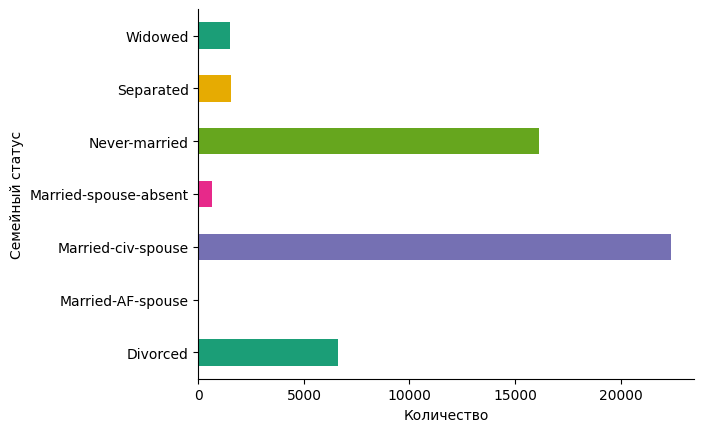

In [ ]:
# Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной

df.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Количество")
plt.ylabel("Семейный статус")

Text(0, 0.5, 'Пол')

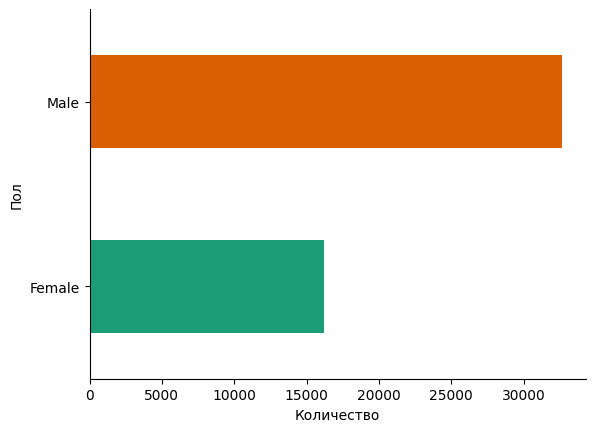

In [ ]:
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Количество")
plt.ylabel("Пол")

Text(0, 0.5, 'Количество')

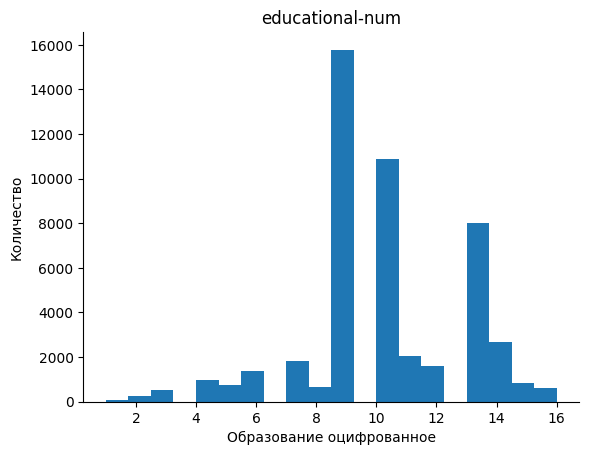

In [ ]:
df['educational-num'].plot(kind='hist', bins=20, title='educational-num')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Образование оцифрованное")
plt.ylabel("Количество")

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
X = pd.get_dummies(df, columns=['income','gender','race','marital-status'],dtype=int) #работа с категориальными столбцами
X = X.dropna() #Удаление пропусков, c данным датасэтом согласно info это не требуется
y=X['income_>50K'] #назначение целевой переменной
X = X.drop(columns=['capital-gain','education','workclass','native-country','fnlwgt','occupation','capital-loss','income_<=50K','income_>50K','relationship']) #удаление лишних столбцов

X.head()

,age,educational-num,hours-per-week,gender_Female,gender_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,7,40,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,38,9,50,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,28,12,40,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,44,10,40,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,18,10,30,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
X.describe()

,age,educational-num,hours-per-week,gender_Female,gender_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382,0.331518,0.668482,0.009623,0.031100,0.095922,0.008313,0.855043,0.135805,0.000758,0.458192,0.012858,0.329982,0.031325,0.031080
std,13.710510,2.570973,12.391444,0.470764,0.470764,0.097624,0.173591,0.294487,0.090794,0.352061,0.342585,0.027513,0.498254,0.112662,0.470211,0.174198,0.173535
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Точность модели LogisticRegression score для тренировочного датасэта ',model.score(X_train, y_train))
print('Точность модели LogisticRegression score для тестового датасэта ',model.score(X_test,y_test))

Точность модели LogisticRegression score для тренировочного датасэта  0.82031070048371
Точность модели LogisticRegression score для тестового датасэта  0.8251612242808886


In [ ]:
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)
print('Точность модели SVC score для тренировочного датасэта ', clf.score(X_train, y_train))
print('Точность модели SVC score для тестового датасэта ',clf.score(X_test, y_test))

Точность модели SVC score для тренировочного датасэта  0.8243032272925038
Точность модели SVC score для тестового датасэта  0.8299723615518477
